<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.tools.database import *
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [3]:
pfs = []
for who in tqdm(get_all_drummers()):
    print(who)
    pf = get_profile(who)
    pfs.append(pf)

100%|██████████| 12/12 [00:00<00:00, 84.07it/s]

aaaaa
carolyn
cuxi
fatfat
eve
oliver
chris
sheep
howeverover
celiven
john
kdchang


In [4]:
pf = pd.concat(pfs, ignore_index=True)
pf

,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_SMA,L_G_SMA,...,R_GX_ZCR,R_GY_ZCR,R_GZ_ZCR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type
0,3.9275,14.9631,0.2284,3.8673,0.6172,3.3195,14.2499,2.2618,4.7128,19.8312,...,0.0500,0.0500,0.0000,-0.4480,0.8114,-0.6615,0.9898,0.6426,0.6989,1
1,4.0190,18.1377,0.0705,3.9631,0.6210,4.2206,17.3308,1.9969,4.7463,23.5483,...,0.1000,0.1000,0.0500,-0.9474,0.9037,-0.9220,0.9141,0.6986,0.5876,1
2,4.0236,13.0400,0.0797,3.9863,0.4837,4.9670,11.2247,-0.6386,4.6413,18.7062,...,0.0500,0.1000,0.0500,-0.8588,-0.0805,0.1700,0.3495,-0.0101,0.9290,1
3,3.8817,11.5477,0.1054,3.8125,0.6401,5.3345,9.4844,-1.5474,4.6708,17.6898,...,0.1500,0.0500,0.0500,0.1073,0.8114,-0.3292,0.9283,-0.3907,-0.1303,1
4,3.9184,17.8125,-0.0924,3.8385,0.6610,8.2228,15.0954,0.7883,4.7812,25.4791,...,0.2000,0.0500,0.0500,-0.0088,0.5145,-0.3856,0.9546,-0.5920,-0.4688,1
5,4.1393,17.0307,-0.1970,4.1014,0.2799,9.4942,6.5689,2.3622,4.7147,24.2722,...,0.1000,0.1000,0.0500,0.0430,0.1501,0.0555,0.9274,-0.6073,-0.4211,1
6,3.9818,18.5457,-0.1735,3.9525,0.0470,9.7296,8.3537,2.1609,4.4877,25.9935,...,0.2500,0.1000,0.1000,0.7447,0.5711,0.1300,0.7668,-0.8121,-0.3206,1
7,4.0699,18.6362,-0.2528,4.0221,-0.1310,7.7808,12.4086,5.2966,4.7920,25.9035,...,0.3000,0.2000,0.1000,0.7817,0.4584,0.0606,0.4203,-0.5448,0.4920,1
8,3.9466,15.9268,-0.1329,3.8979,-0.1194,1.8603,11.0576,6.1554,4.6424,20.6081,...,0.1500,0.2000,0.1000,0.4283,0.5776,0.2290,0.8782,-0.0981,0.3126,1
9,3.8751,18.4633,-0.0771,3.8387,-0.0603,0.5273,12.7156,8.8432,4.4283,23.5712,...,0.1500,0.0500,0.1000,0.3827,0.5499,0.2712,0.8733,-0.3636,-0.0137,1


# LGBM training

In [5]:
train_df = pf

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

x_train, x_valid_1, y_train, y_valid_1 = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)

y_train

6097    4
411     4
2578    3
4483    2
6420    1
5318    2
1673    2
2595    4
1377    4
2477    2
2299    1
4210    1
4442    2
1591    1
6225    0
3753    3
1431    0
3338    5
3108    2
5276    2
3088    2
2122    5
6206    0
1807    2
103     3
2204    1
3653    2
3241    4
2978    1
6451    1
       ..
192     5
939     4
2163    1
6858    4
5238    2
816     2
3714    2
5058    1
747     2
3048    2
5554    1
4685    3
1700    2
3738    3
5493    5
430     0
5811    2
570     1
5226    2
3659    2
466     5
5910    2
3679    2
7000    5
5777    2
3632    2
915     4
3673    2
904     3
3878    0
Name: hit_type, Length: 5601, dtype: int64

In [6]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [7]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid_1, y_valid_1, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 6,
#     'min_data_in_leaf': 3,
    'max_depth': 5,
    'num_leaves': 2 ** 5,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=200, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred_1 = model.predict(x_valid_1, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.859683
[10]	valid_0's f1-score: 0.881912
[15]	valid_0's f1-score: 0.907802
[20]	valid_0's f1-score: 0.924764
[25]	valid_0's f1-score: 0.932909
[30]	valid_0's f1-score: 0.941787
[35]	valid_0's f1-score: 0.951176
[40]	valid_0's f1-score: 0.952189
[45]	valid_0's f1-score: 0.960663
[50]	valid_0's f1-score: 0.966441
[55]	valid_0's f1-score: 0.965977
[60]	valid_0's f1-score: 0.969717
[65]	valid_0's f1-score: 0.970422
[70]	valid_0's f1-score: 0.972839
[75]	valid_0's f1-score: 0.973181
[80]	valid_0's f1-score: 0.976206
[85]	valid_0's f1-score: 0.976882
[90]	valid_0's f1-score: 0.976986
[95]	valid_0's f1-score: 0.975162
[100]	valid_0's f1-score: 0.976294
[105]	valid_0's f1-score: 0.974264
[110]	valid_0's f1-score: 0.976011
[115]	valid_0's f1-score: 0.975563
[120]	valid_0's f1-score: 0.976493
[125]	valid_0's f1-score: 0.975563
[130]	valid_0's f1-score: 0.975609
[135]	valid_0's f1-score: 0.97472
[140]	valid_0

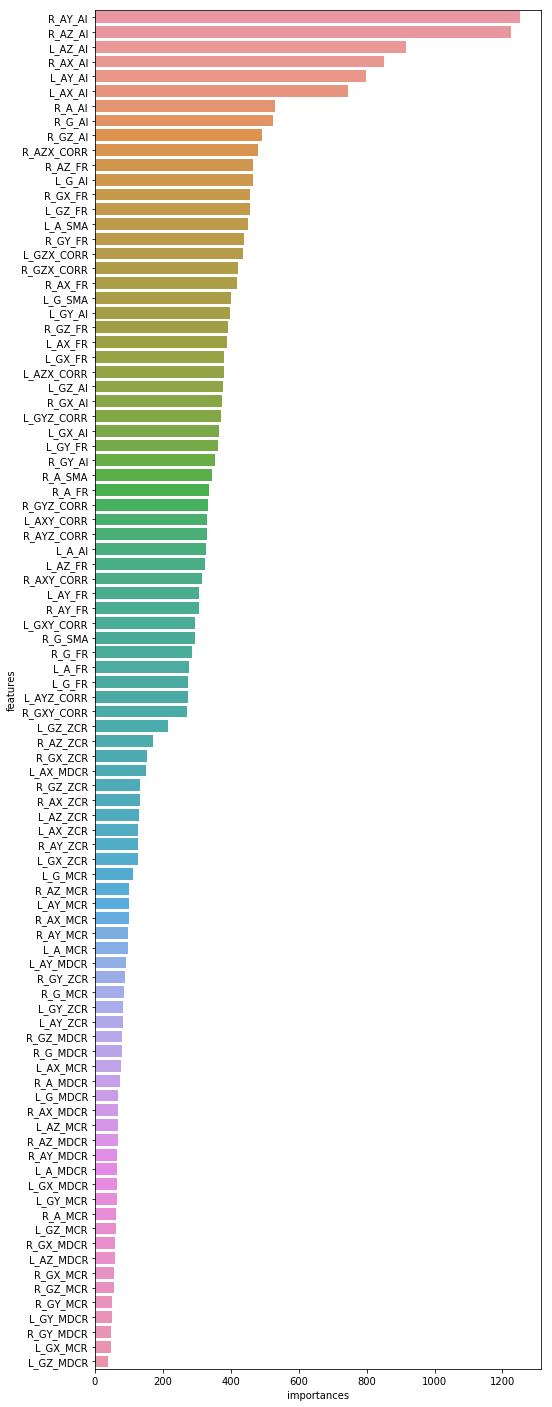

In [8]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [9]:
y_test = []
for y_pred in [y_pred_1]:
    predictions = []
    for x in y_pred:
        predictions.append(np.argmax(x))
    y_test.append(pd.Series(data=predictions))

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.98659517 0.0080429  0.00536193 0.         0.        ]
 [0.         0.01336898 0.98395722 0.0026738  0.         0.        ]
 [0.00529101 0.00529101 0.         0.95767196 0.02116402 0.01058201]
 [0.         0.         0.         0.01058201 0.98941799 0.        ]
 [0.         0.00613497 0.         0.04294479 0.00613497 0.94478528]]


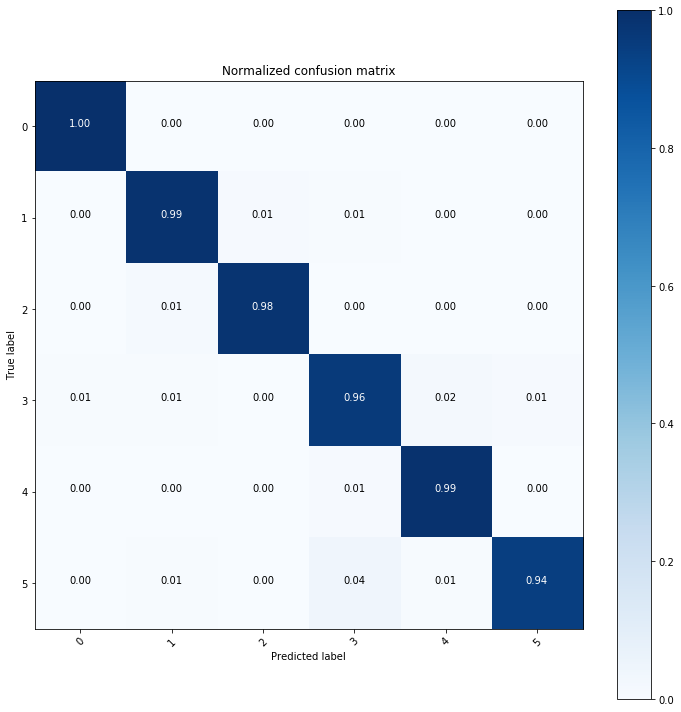

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       113
          1       0.98      0.99      0.98       373
          2       0.99      0.98      0.99       374
          3       0.94      0.96      0.95       189
          4       0.97      0.99      0.98       189
          5       0.99      0.94      0.97       163

avg / total       0.98      0.98      0.98      1401

0.9770433188366335


In [12]:
y_valid = [y_valid_1]
for y_val, y_tst in zip(y_valid, y_test):
    cutstom_output_cnf_matrix(y_val, y_tst)
    print(metrics.classification_report(y_val, y_tst))
    
    print(metrics.f1_score(y_tst, y_val, average = 'macro'))

In [13]:
model.save_model('lgbm_model.h5')